# Завдання на Лабоарторну роботу №3

## Перша частина - Бінарна класифікація (Binary Classification) з генерацією даних:


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np                   # NumPy для роботи з числовими даними

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV


In [36]:
# Згенеруємо набір даних для бінарної класифікації
X, y = make_classification(
    n_samples=1000,  # Кількість прикладів у наборі даних
    n_features=2,    # Кількість ознак
    n_informative=2, # Кількість інформативних ознак
    n_redundant=0,   # Кількість зайвих ознак
    n_clusters_per_class=1, # Кількість кластерів на клас
    random_state=42   # Випадковий стан для відтворюваності
)

# Об'єднаємо ознаки та мітки у один DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature1', 'Feature2', 'Class'])

# Збережемо дані у CSV файл
df.to_csv('data_for_part1.csv', index=False)

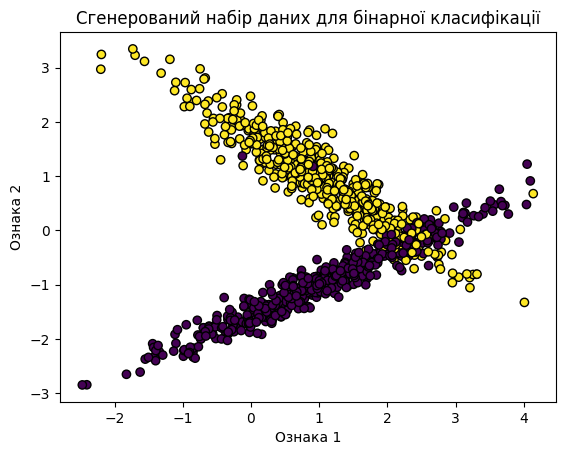

In [37]:
# Відобразимо створений набір даних
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Сгенерований набір даних для бінарної класифікації')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

In [38]:
# Завантаження даних
data = pd.read_csv('data_for_part1.csv')

# Розділення на ознаки (X) та цільову змінну (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# # Визначення простору параметрів для Grid Search
# param_grid_svc = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf', 'poly'],
#               'gamma': [0.1, 0.01, 0.001, 0.0001]}

# # Ініціалізація моделі та пошук оптимальних параметрів
# grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
# grid_search_svc.fit(X, y)
# best_params_svc = grid_search_svc.best_params_
# print(best_params_svc)

# {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

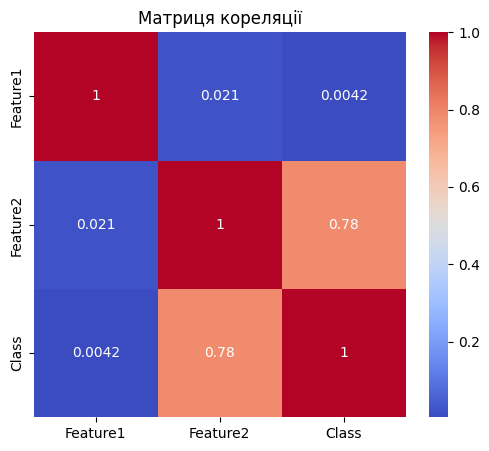

In [76]:
# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

Logistic Regression Results:
Accuracy: 90.0 %
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       104
         1.0       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix:
[[97  7]
 [13 83]]
AUC-ROC Score: 0.946514423076923


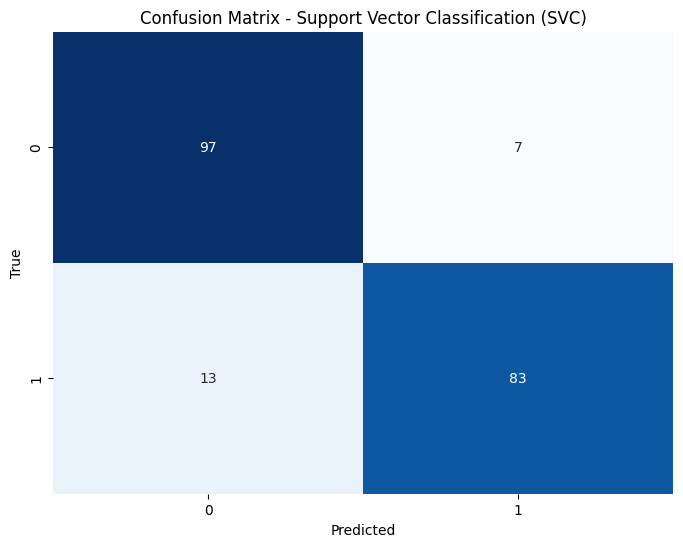

In [77]:
# Ініціалізація та навчання логістичної регресії
logistic_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
logistic_model.fit(X_train, y_train)

# Прогноз на тестовому наборі
y_pred_logistic = logistic_model.predict(X_test)
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Ймовірності для AUC-ROC

# Оцінка ефективності логістичної регресії
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic)*100, '%')
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba_logistic))

# Візуалізація матриці плутанини для SVC
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Classification (SVC)')
plt.show()

In [78]:
from sklearn.model_selection import cross_val_score

# model - ваша модель
scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

print("---Для Logistic Regression---\n")
# Оцінка точності для кожного з k спроб
for i, score in enumerate(scores):
    print("Спроба {}: {:.2f}".format(i + 1, score))

# Оцінка середньої точності та її стандартного відхилення
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("\nСередня точність: {:.2f}".format(mean_accuracy))
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

---Для Logistic Regression---

Спроба 1: 0.88
Спроба 2: 0.91
Спроба 3: 0.89
Спроба 4: 0.93
Спроба 5: 0.92

Середня точність: 0.90
Стандартне відхилення точності: 0.02



Support Vector Classification (SVC) Results:
Accuracy: 93.5 %
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       104
         1.0       0.97      0.90      0.93        96

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200

Confusion Matrix:
[[101   3]
 [ 10  86]]
AUC-ROC Score: 0.9811698717948718


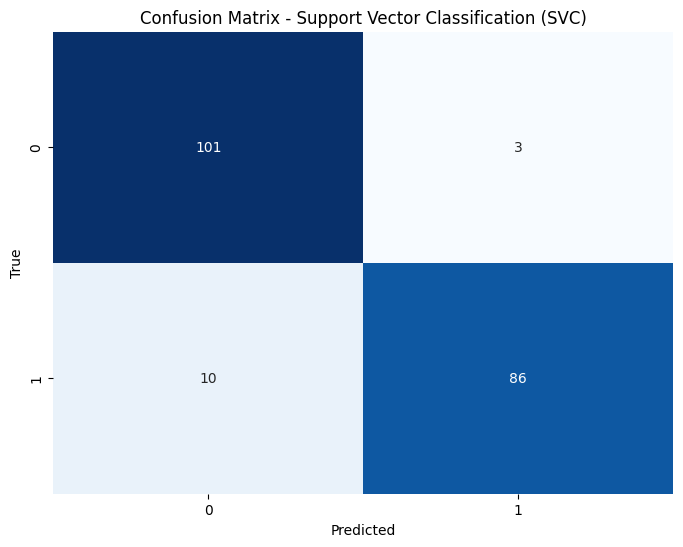

In [103]:
# Ініціалізація та навчання методу опорних векторів (SVC)
svc_model = SVC(probability=True, C=100, gamma=0.1, kernel='rbf')
svc_model.fit(X_train, y_train)

# Прогноз на тестовому наборі
y_pred_svc = svc_model.predict(X_test)
y_proba_svc = svc_model.decision_function(X_test)  # Використовуйте decision_function для AUC-ROC

# Оцінка ефективності SVC
print("\nSupport Vector Classification (SVC) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc)*100, '%')
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba_svc))

# Візуалізація матриці плутанини для SVC
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Classification (SVC)')
plt.show()

In [104]:
from sklearn.model_selection import cross_val_score

# model - ваша модель
scores = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

print("---Для SVC---\n")
# Оцінка точності для кожного з k спроб
for i, score in enumerate(scores):
    print("Спроба {}: {:.2f}".format(i + 1, score))

# Оцінка середньої точності та її стандартного відхилення
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("\nСередня точність: {:.2f}".format(mean_accuracy))
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

---Для SVC---

Спроба 1: 0.94
Спроба 2: 0.93
Спроба 3: 0.94
Спроба 4: 0.96
Спроба 5: 0.94

Середня точність: 0.94
Стандартне відхилення точності: 0.01


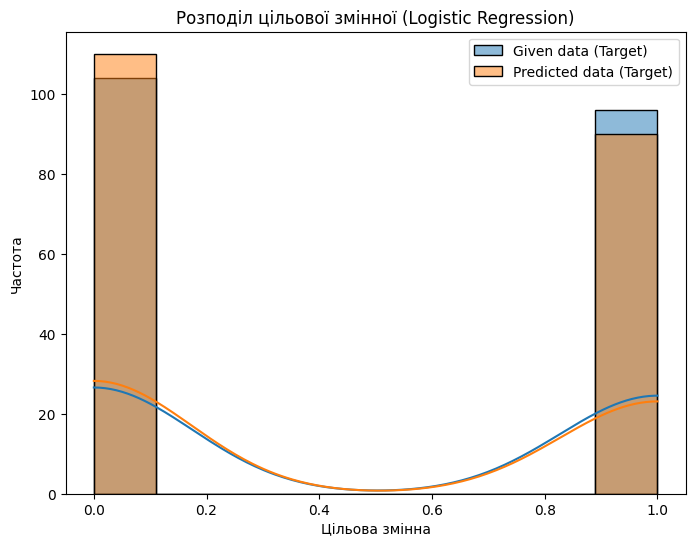

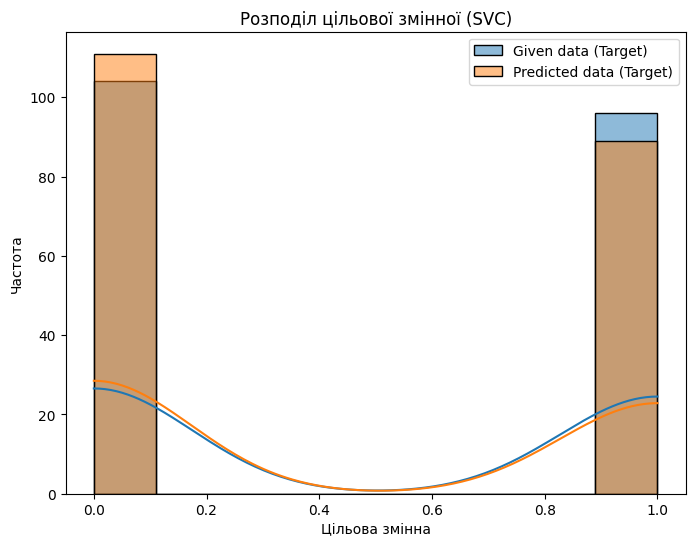

In [105]:
# Візуалізація розподілу цільової змінної (target)
plt.figure(figsize=(8, 6))
# plt.subplot(1, 2, 1)
sns.histplot(y_test , kde=True, label='Given data (Target)')
sns.histplot(y_pred_logistic, kde=True, label='Predicted data (Target)')
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.title('Розподіл цільової змінної (Logistic Regression)')
plt.legend()
plt.show()

# Візуалізація розподілу цільової змінної (target)
plt.figure(figsize=(8, 6))
# plt.subplot(1, 2, 2)
sns.histplot(y_test , kde=True, label='Given data (Target)')
sns.histplot(y_pred_svc, kde=True, label='Predicted data (Target)')
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.title('Розподіл цільової змінної (SVC)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Графік логістичної регресії (SVC)')

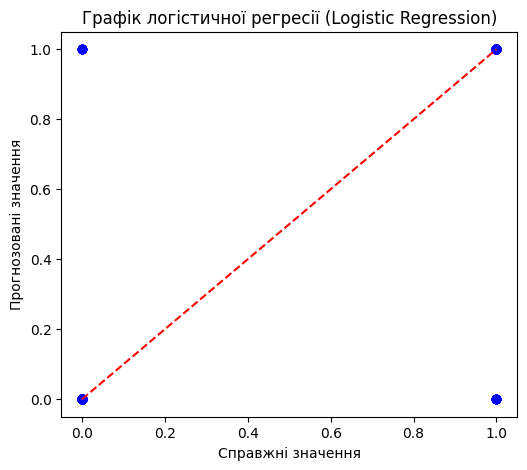

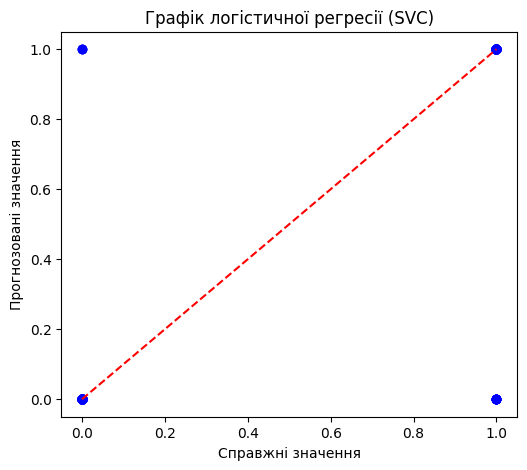

In [106]:
# Побудуємо діаграму розсіювання
# Візуалізація результатів
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y_test, y_pred_logistic, color='blue')
plt.plot([min(y), max(y)], [min(y_pred_logistic), max(y_pred_logistic)], linestyle='--', color='red')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Графік логістичної регресії (Logistic Regression)")

# Побудуємо діаграму розсіювання
# Візуалізація результатів
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y_test, y_pred_svc, color='blue')
plt.plot([min(y), max(y)], [min(y_pred_svc), max(y_pred_svc)], linestyle='--', color='red')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Графік логістичної регресії (SVC)")

## Частина друга - Мультикласова класифікація (Multiclass Classification):

Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації.
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини.
Порівняйте результати різних класифікаторів.

Мультикласова класифікація - це задача, в якій модель вивчає прогнозувати класи для більш ніж двох можливих значень цільової змінної. (Не тільки 0 чи 1)

### Підготовка даних

Підключення бібліотек

In [107]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
##
# from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



Завантаження даних для мультикласової класифікації з файлу

In [108]:
# Завантаження даних
data = pd.read_csv('multiclass_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'multiclass_dataset.csv'

In [ ]:
print(data.head())

   Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Target
0 -1.810057 -0.673058  0.086590 -0.155677  0.181484  1.025221       1
1 -1.902231 -0.843628  0.632782  2.270693  0.671189  1.190941       1
2  0.854693  0.706958 -0.524520  0.489375 -1.457497 -0.808198       2
3 -2.540925 -1.049519 -1.304470  0.669673  0.623820  1.526378       0
4  1.257316  0.035007 -0.858358  0.700310  1.398636 -0.351927       3


Перевірка на пропущені значення

In [ ]:
# Перевірка на пропущені значення
missing_values = data.isnull().sum()
non_zero_missing_values = missing_values[missing_values > 0]
print(non_zero_missing_values)

# Нема

Series([], dtype: int64)


In [ ]:
data['Target'].value_counts()

Target
1    50
2    50
0    50
3    50
Name: count, dtype: int64

Вибір цільової змінної

In [ ]:
# Вибір цільової змінної (відгуку) та предикторів
np.random.seed(42)

X = data.drop(['Target'], axis=1)
y = data['Target']

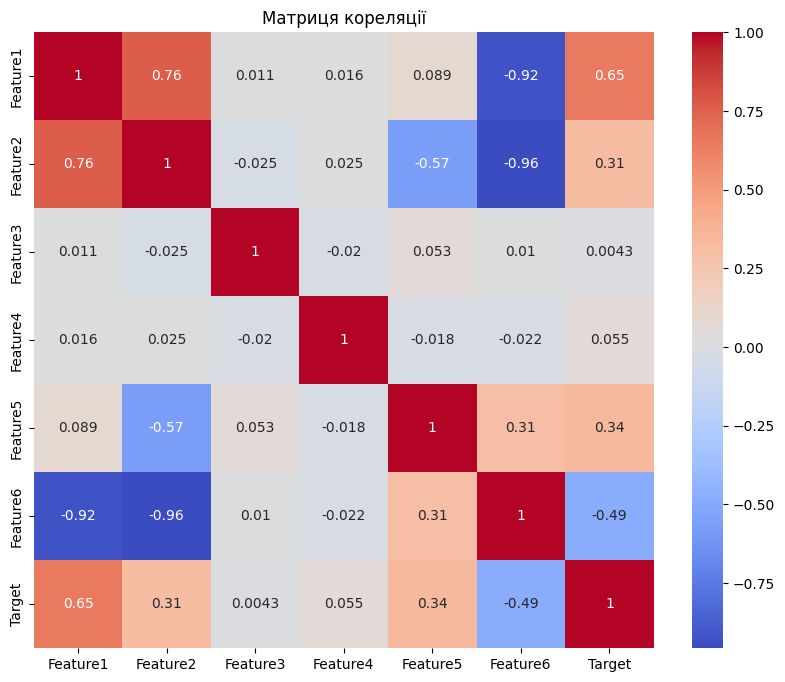

In [ ]:
# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

### Підбір гіперпараметрів

In [ ]:
# # Визначення гіперпараметрів та їх значень
# param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}
# # Ініціалізація моделі та пошук оптимальних параметрів
# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# grid_search.fit(X, y)
# best_params = grid_search.best_params_
# print(best_params)

# {'max_depth': 3, 'n_estimators': 100}

In [ ]:
# Визначення простору параметрів для Grid Search
# param_grid_svc = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf', 'poly'],
#               'gamma': [0.1, 0.01, 0.001, 0.0001]}

# # Ініціалізація моделі та пошук оптимальних параметрів
# grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
# grid_search_svc.fit(X, y)
# best_params_svc = grid_search_svc.best_params_
# print(best_params_svc)

# {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
# # Стандартизація ознак
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# y = scaler.transform(y)

In [ ]:
# # Визначення простору параметрів для Grid Search
# param_grid_lr = {'C': [0.1, 1, 10, 100],
#               'penalty': ['l1', 'l2'],
#               'fit_intercept': [True, False],
#               'solver': ['liblinear', 'saga']}

# # Grid Search з крос-валідацією
# grid_search_lr = GridSearchCV(LogisticRegression(max_iter=6000), param_grid_lr, cv=5)
# grid_search_lr.fit(X, y)
# best_params_lr = grid_search_lr.best_params_
# print(best_params_lr)

# {'C': 1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

### Тренування різних моделей використовуючи Cross-Validation

In [ ]:
# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

# Оцінка ефективності RandomForestClassifier
print("---RandomForestClassifier Results:---")
print("\nAccuracy:", accuracy_score(y_test, rf_pred)*100, "%")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

---RandomForestClassifier Results:---

Accuracy: 70.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.67      0.50      0.57         8
           2       0.79      0.79      0.79        14
           3       0.73      1.00      0.85        11

    accuracy                           0.70        40
   macro avg       0.65      0.64      0.63        40
weighted avg       0.68      0.70      0.68        40

Confusion Matrix:
[[ 2  2  3  0]
 [ 3  4  0  1]
 [ 0  0 11  3]
 [ 0  0  0 11]]


In [ ]:
from sklearn.model_selection import cross_val_score

# model - ваша модель
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

print("---Random Forest Classifier---\n")
# Оцінка точності для кожного з k спроб
for i, score in enumerate(scores):
    print("Спроба {}: {:.2f}".format(i + 1, score))

# Оцінка середньої точності та її стандартного відхилення
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("\nСередня точність: {:.2f}".format(mean_accuracy))
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

---Random Forest Classifier---

Спроба 1: 0.75
Спроба 2: 0.82
Спроба 3: 0.62
Спроба 4: 0.75
Спроба 5: 0.70

Середня точність: 0.73
Стандартне відхилення точності: 0.07


In [ ]:
# 2.SVC
svc_classifier = SVC(C=10, gamma=0.001, kernel='rbf')
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)

# Оцінка ефективності RandomForestClassifier
print("---SVC Results:---")
print("\nAccuracy:", accuracy_score(y_test, svc_pred)*100, "%")
print("\nClassification Report:")
print(classification_report(y_test, svc_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_pred))


---SVC Results:---

Accuracy: 67.5 %

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       1.00      0.38      0.55         8
           2       0.75      0.64      0.69        14
           3       0.79      1.00      0.88        11

    accuracy                           0.68        40
   macro avg       0.72      0.65      0.64        40
weighted avg       0.74      0.68      0.67        40

Confusion Matrix:
[[ 4  0  3  0]
 [ 4  3  0  1]
 [ 3  0  9  2]
 [ 0  0  0 11]]


In [ ]:
from sklearn.model_selection import cross_val_score

# model - ваша модель
scores = cross_val_score(svc_classifier, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

print("---SVC---\n")
# Оцінка точності для кожного з k спроб
for i, score in enumerate(scores):
    print("Спроба {}: {:.2f}".format(i + 1, score))

# Оцінка середньої точності та її стандартного відхилення
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("\nСередня точність: {:.2f}".format(mean_accuracy))
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

---SVC---

Спроба 1: 0.70
Спроба 2: 0.82
Спроба 3: 0.72
Спроба 4: 0.70
Спроба 5: 0.78

Середня точність: 0.74
Стандартне відхилення точності: 0.05


In [ ]:
# 3.Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000, C=1, fit_intercept=True, penalty='l2', solver='saga')
lr_classifier.fit(X_train, y_train)
lr_pred = lr_classifier.predict(X_test)

# Оцінка ефективності LogisticRegression
print("---Logistic Regression Results:---")
print("\nAccuracy:", accuracy_score(y_test, lr_pred)*100, "%")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

---Logistic Regression Results:---

Accuracy: 65.0 %

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.50      0.25      0.33         8
           2       0.73      0.79      0.76        14
           3       0.82      0.82      0.82        11

    accuracy                           0.65        40
   macro avg       0.61      0.61      0.60        40
weighted avg       0.65      0.65      0.64        40

Confusion Matrix:
[[ 4  0  3  0]
 [ 5  2  0  1]
 [ 1  1 11  1]
 [ 0  1  1  9]]


In [ ]:
from sklearn.model_selection import cross_val_score

# model - ваша модель
scores = cross_val_score(lr_classifier, X, y, cv=5, scoring='accuracy')  # розділення на 5 частин

print("---Logistic Regression---\n")
# Оцінка точності для кожного з k спроб
for i, score in enumerate(scores):
    print("Спроба {}: {:.2f}".format(i + 1, score))

# Оцінка середньої точності та її стандартного відхилення
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print("\nСередня точність: {:.2f}".format(mean_accuracy))
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))

---Logistic Regression---

Спроба 1: 0.72
Спроба 2: 0.82
Спроба 3: 0.78
Спроба 4: 0.70
Спроба 5: 0.85

Середня точність: 0.77
Стандартне відхилення точності: 0.06


### Візуалізація (Random Forest Classifier)

Гістограма

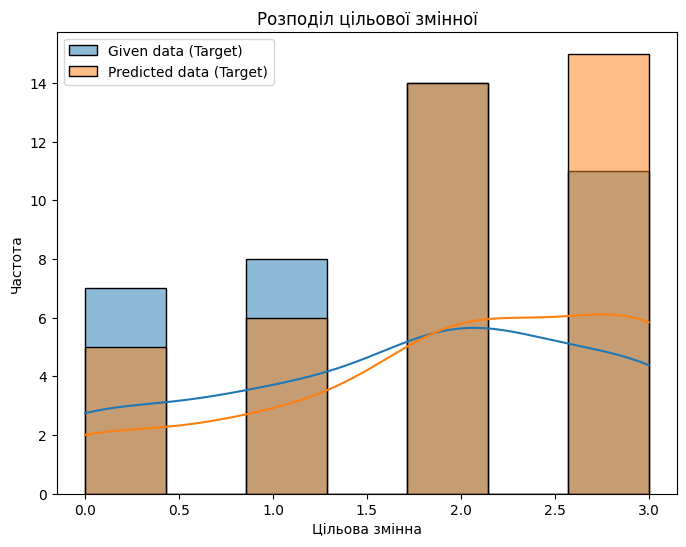

In [ ]:
# Візуалізація розподілу цільової змінної (target)
plt.figure(figsize=(8, 6))
sns.histplot(y_test , kde=True, label='Given data (Target)')
sns.histplot(rf_pred, kde=True, label='Predicted data (Target)')
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.title('Розподіл цільової змінної')
plt.legend()
plt.show()

Матриця плутанини

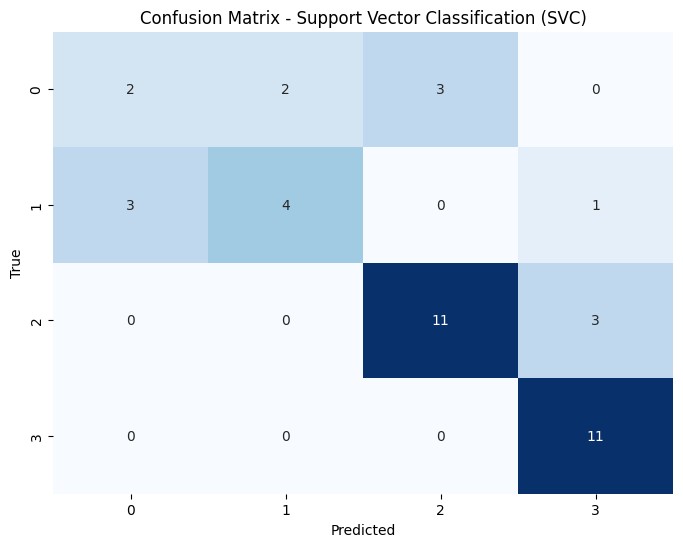

In [ ]:
# Візуалізація матриці плутанини для SVC
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Classification (SVC)')
plt.show()

Text(0.5, 1.0, 'Графік логістичної регресії')

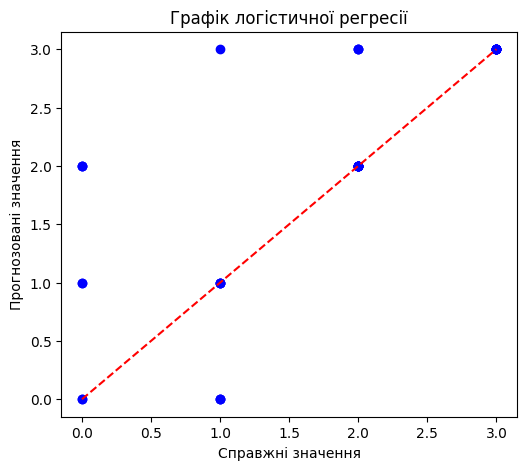

In [ ]:
# Побудуємо діаграму розсіювання
# Візуалізація результатів
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y_test, rf_pred, color='blue')
plt.plot([min(y), max(y)], [min(rf_pred), max(rf_pred)], linestyle='--', color='red')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Графік логістичної регресії")

### Висновки
У ході виконання мультикласової класифікації були розділені дані на тастові та навчальні, були використані різні моделі та підібрані гіперпараметри до них. 

Також, був створений прогноз, оцінена точність моделей, і наявна візуалізація

## Частина третя - Мультилейблова класифікація (Multilabel Classification)

Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації. Набір даних "multilabel_dataset.csv" містить Feature1, Feature2, Feature3, Labe1, Label2, Label3, Label4
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
Вивчайте, як класифікатори працюють з різними комбінаціями мультилейбів.

Використати різні моделі класифікації, налаштувати гіперпараметри, оцінити їхню ефективність та вивчити роботу з метриками якості та візуалізацією результатів.

### Підготовка даних

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer
# import itertools

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

from sklearn.neural_network import MLPClassifier

np.random.seed(42)

# Завантаження даних
data = pd.read_csv('multilabel_dataset.csv')

# Розділення на ознаки (X) та цільові лейбли (y)
X = data[['Feature1', 'Feature2', 'Feature3']]
y = data[['Label1', 'Label2', 'Label3', 'Label4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

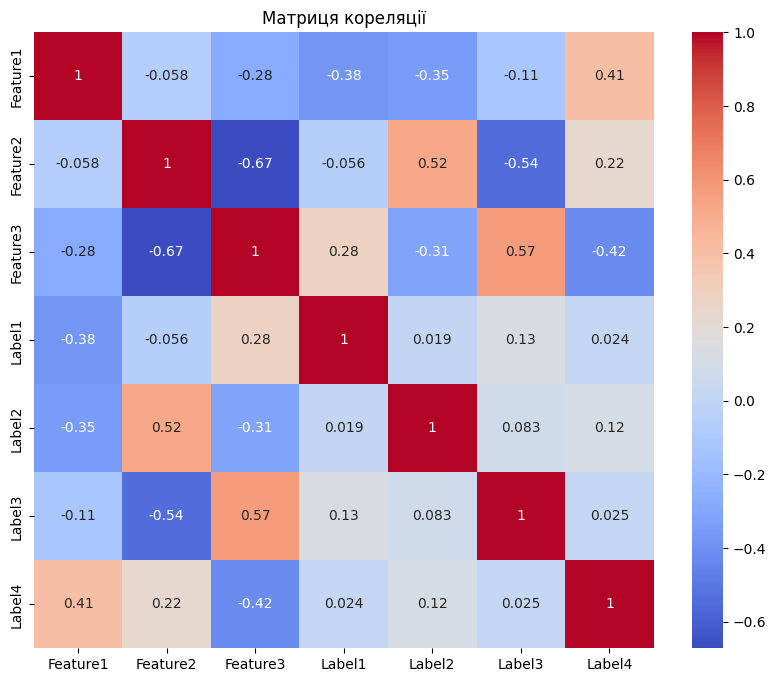

In [ ]:
# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

### Random Forest Classifier

In [ ]:
# Встановлення однакових значень для всіх лейблів
uniform_label_value = 1
# y_train = pd.DataFrame(data=uniform_label_value, index=y_train.index, columns=y_train.columns)
# y_test = pd.DataFrame(data=uniform_label_value, index=y_test.index, columns=y_test.columns)

# Create the MultiOutputClassifier with RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=7, n_estimators=70)
multi_output_classifier = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# Train the classifier
multi_output_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = multi_output_classifier.predict(X_test)

# Evaluate the performance for each label
for i, label in enumerate(y.columns):
    print(f"\nResults for {label}:")
    print("Accuracy:", accuracy_score(y_test[label], y_pred[:, i]))
    print("Recall:", recall_score(y_test[label], y_pred[:, i]))
    print("F1 Score:", f1_score(y_test[label], y_pred[:, i]))


Results for Label1:
Accuracy: 0.825
Recall: 0.4444444444444444
F1 Score: 0.5333333333333333

Results for Label2:
Accuracy: 0.825
Recall: 0.9523809523809523
F1 Score: 0.8510638297872339

Results for Label3:
Accuracy: 0.775
Recall: 0.7368421052631579
F1 Score: 0.7567567567567567

Results for Label4:
Accuracy: 0.675
Recall: 0.5454545454545454
F1 Score: 0.6486486486486486


In [ ]:
# Evaluate the performance for each label
for i, label in enumerate(y.columns):
    print(f"\nResults for {label}:")
    print("Classification Report:")
    print(classification_report(y_test[label], y_pred[:, i]))


Results for Label1:
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.67      0.44      0.53         9

    accuracy                           0.82        40
   macro avg       0.76      0.69      0.71        40
weighted avg       0.81      0.82      0.81        40


Results for Label2:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       0.77      0.95      0.85        21

    accuracy                           0.82        40
   macro avg       0.85      0.82      0.82        40
weighted avg       0.84      0.82      0.82        40


Results for Label3:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.78      0.74      0.76        19

    accuracy                           0.78       

### Багатошарова нейронна мережа

In [ ]:
# Встановлення однакових значень для всіх лейблів
uniform_label_value = 1
# y_train = pd.DataFrame(data=uniform_label_value, index=y_train.index, columns=y_train.columns)
# y_test = pd.DataFrame(data=uniform_label_value, index=y_test.index, columns=y_test.columns)

# Створення та навчання багатошарової нейронної мережі
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
multi_output_classifier_2 = MultiOutputClassifier(mlp_classifier, n_jobs=-1)
multi_output_classifier_2.fit(X_train, y_train)

# Прогнози на тестовому наборі
y_pred = multi_output_classifier_2.predict(X_test)

# Оцінка ефективності для кожного лейбла
for i, label in enumerate(y.columns):
    print(f"\nResults for {label}:")
    print("Accuracy:", accuracy_score(y_test[label], y_pred[:, i]))
    print("Recall:", recall_score(y_test[label], y_pred[:, i]))
    print("F1 Score:", f1_score(y_test[label], y_pred[:, i]))



Results for Label1:
Accuracy: 0.825
Recall: 0.6666666666666666
F1 Score: 0.631578947368421

Results for Label2:
Accuracy: 0.85
Recall: 0.9523809523809523
F1 Score: 0.8695652173913043

Results for Label3:
Accuracy: 0.825
Recall: 0.8947368421052632
F1 Score: 0.8292682926829269

Results for Label4:
Accuracy: 0.7
Recall: 0.6818181818181818
F1 Score: 0.7142857142857143


In [ ]:
# Оцінка ефективності для кожного лейбла
for i, label in enumerate(y.columns):
    print(f"\nResults for {label}:")
    print("\nClassification Report:")
    print(classification_report(y_test[label], y_pred[:, i]))


Results for Label1:

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.60      0.67      0.63         9

    accuracy                           0.82        40
   macro avg       0.75      0.77      0.76        40
weighted avg       0.83      0.82      0.83        40


Results for Label2:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.80      0.95      0.87        21

    accuracy                           0.85        40
   macro avg       0.87      0.84      0.85        40
weighted avg       0.86      0.85      0.85        40


Results for Label3:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.77      0.89      0.83        19

    accuracy                           0.82    

### Візуалізація для Багатошарової нейронної мережі

Гістограми

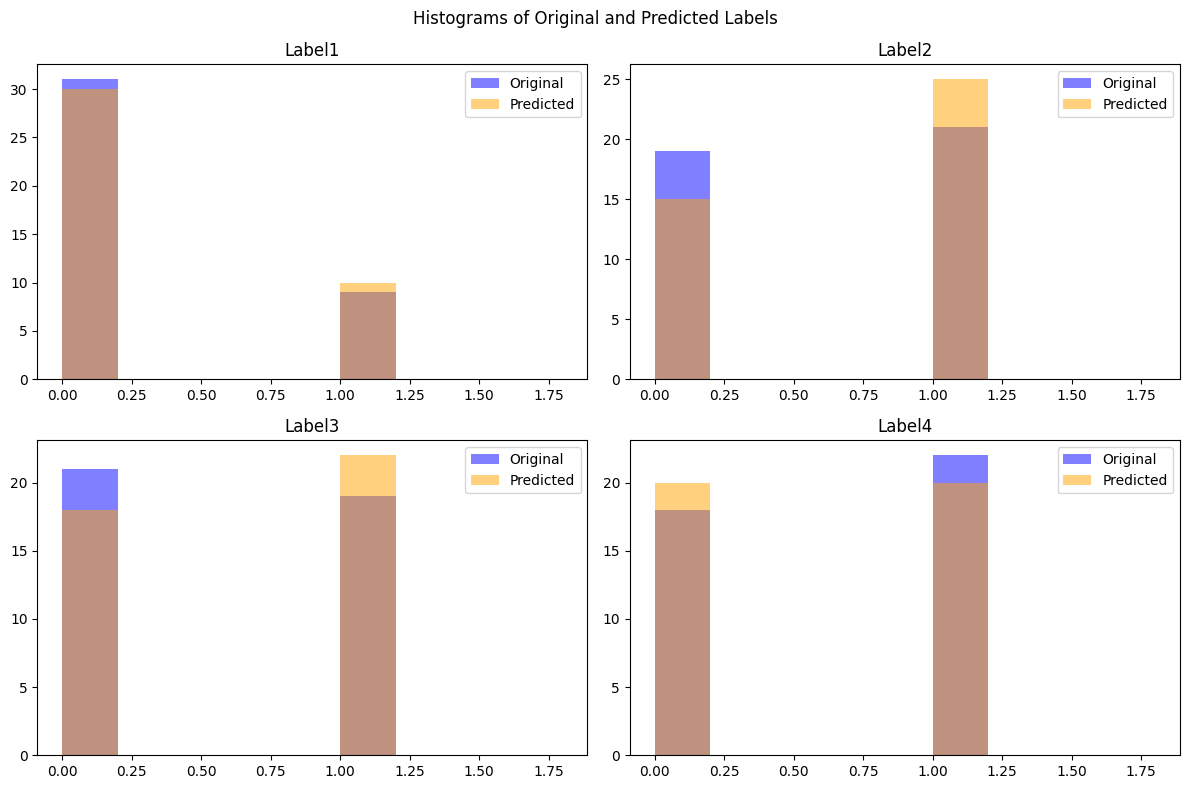

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Оригінальні дані та передбачення
original_data = y_test  # Оригінальні лейбли
predicted_data = pd.DataFrame(data=y_pred, columns=y_test.columns)  # Передбачені лейбли

# Візуалізація гістограм
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Histograms of Original and Predicted Labels')

# Розміри бінів
bin_edges = np.arange(0, 2, 0.2)

# Візуалізація для кожного лейбла
for i, label in enumerate(y_test.columns):
    row, col = divmod(i, 2)
    
    # Оригінальні дані
    axs[row, col].hist(original_data[label], bins=bin_edges, alpha=0.5, color='blue', label='Original')
    
    # Передбачені дані
    axs[row, col].hist(predicted_data[label], bins=bin_edges, alpha=0.5, color='orange', label='Predicted')
    
    axs[row, col].set_title(label)
    axs[row, col].legend()

plt.tight_layout()
plt.show()


Графіки

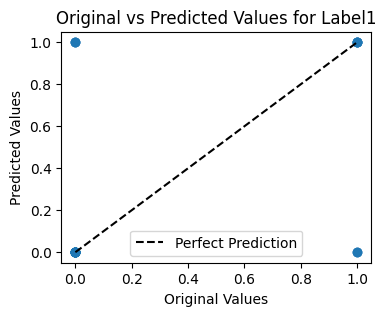

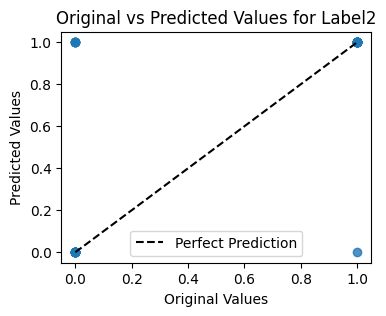

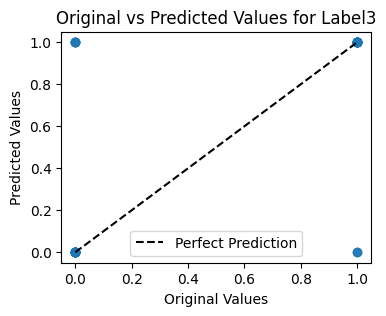

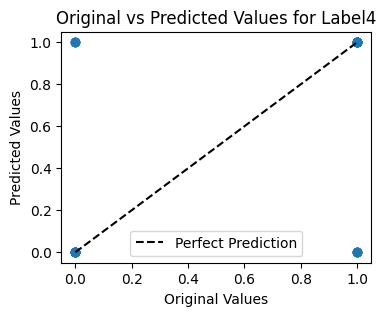

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Оригінальні дані та передбачення
original_data = y_test  # Оригінальні лейбли
predicted_data = pd.DataFrame(data=y_pred, columns=y_test.columns)  # Передбачені лейбли

# Створення графіків для кожного лейбла
for label in y_test.columns:
    fig, ax = plt.subplots(figsize=(4, 3))
    
    # Візуалізація оригінальних та передбачених значень
    ax.scatter(original_data[label], predicted_data[label], alpha=0.8)
    
    # Додавання лінії збігу
    min_val = min(original_data[label].min(), predicted_data[label].min())
    max_val = max(original_data[label].max(), predicted_data[label].max())
    ax.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='Perfect Prediction')
    
    # Додавання легенди та меток осей
    ax.set_title(f'Original vs Predicted Values for {label}')
    ax.set_xlabel('Original Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()
    
    plt.show()


### Висновок
У цій частині я використала RandomForestClassification та MLPClassifier для виконання Multilabel Classification